In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'

dpi = 150

hue_order = ["VAE", "PCA", "nanoTxformer", "RandomProjection"]
c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]
pretty_palette = [c6[c] for c in range(6) if c in [1,2,3,5]]

In [3]:
merf_df = pd.read_csv('../results/MERFISH_scaling.csv', index_col=0)
cite_df = pd.read_csv('../results/PBMC_CITEseq_scaling.csv', index_col=0)
larry_df = pd.read_csv('../results/LARRY_scaling.csv', index_col=0)

In [4]:
def add_delta_mi(df, mi_column):
    avg_random_proj = (
        df[df["Method"] == "RandomProjection"]
        .groupby("UMI per cell")[mi_column]
        .transform("mean")
    )
    df["avg_random_proj"] = df["UMI per cell"].map(
        df[df["Method"] == "RandomProjection"]
        .groupby("UMI per cell")[mi_column]
        .mean()
    )
    df[f"delta {mi_column}"] = df[mi_column] - df['avg_random_proj']
    df[f"Info gain ({mi_column})"] = df[f"delta {mi_column}"] / np.log10(df['Cell number'])
    return df

cite_df = add_delta_mi(cite_df, "Protein MI")
cite_df = add_delta_mi(cite_df, "Cell type fine MI")
merf_df = add_delta_mi(merf_df, "Spatial neighborhood MI")
larry_df = add_delta_mi(larry_df, "Clonal MI")

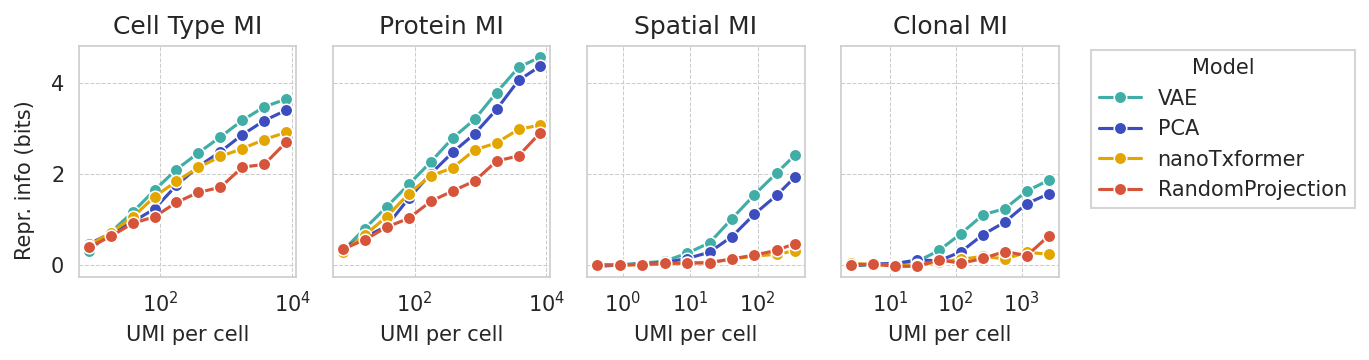

In [15]:
fig = plt.figure(figsize=(9, 2.5), dpi=dpi)

# create subplots
ct, prot, merf, larry = fig.subplots(1, 4, sharey=True)

# max cells and plots
max_cells = merf_df['Cell number'].max()
sns.lineplot(data=merf_df[merf_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Spatial neighborhood MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=merf)
merf.set_title('Spatial MI')
merf.set_xscale('log')

max_cells = larry_df['Cell number'].max()
sns.lineplot(data=larry_df[larry_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Clonal MI',
             hue='Method', legend=True, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=larry)
larry.set_title('Clonal MI')
larry.set_xscale('log')

max_cells = cite_df['Cell number'].max()
sns.lineplot(data=cite_df[cite_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Protein MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=prot)
prot.set_title('Protein MI')
prot.set_xscale('log')

sns.lineplot(data=cite_df[cite_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Cell type fine MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=ct)
ct.set_ylabel('')
ct.set_title('Cell Type MI')
ct.set_xscale('log')

# adjust legend
sns.move_legend(larry, "upper left", bbox_to_anchor=(1.1, 1.03), title='Model')

# shared y-axis label
fig.text(-0.01, 0.5, 'Repr. info (bits)', va='center', 
         rotation='vertical', fontsize=10)

plt.tight_layout()
plt.show()

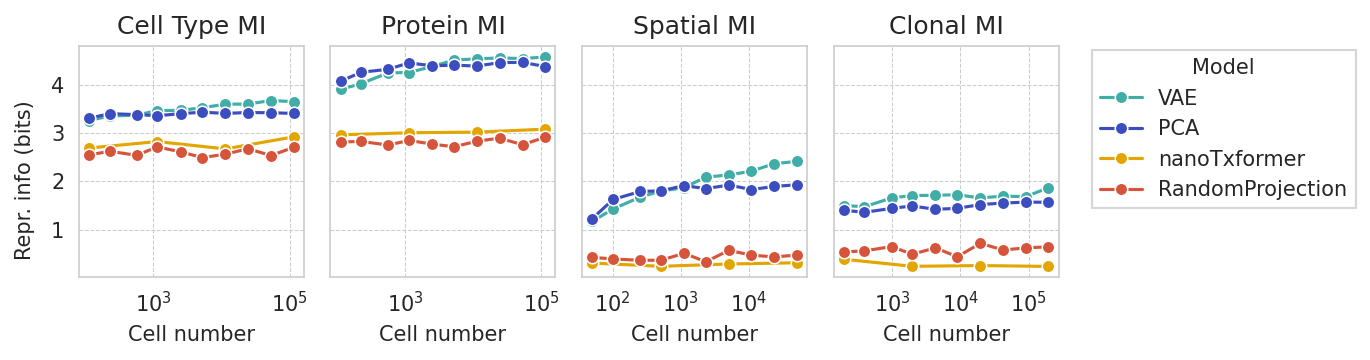

In [16]:
fig = plt.figure(figsize=(9, 2.5), dpi=dpi)

# create subplots
ct, prot, merf, larry = fig.subplots(1, 4, sharey=True)

# max cells and plots
max_umi = merf_df['UMI per cell'].max()
sns.lineplot(data=merf_df[merf_df['UMI per cell'] == max_umi], 
             x='Cell number', y='Spatial neighborhood MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=merf)
merf.set_title('Spatial MI')
merf.set_xscale('log')

max_umi = larry_df['UMI per cell'].max()
sns.lineplot(data=larry_df[larry_df['UMI per cell'] == max_umi], 
             x='Cell number', y='Clonal MI',
             hue='Method', legend=True, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=larry)
larry.set_title('Clonal MI')
larry.set_xscale('log')

max_umi = cite_df['UMI per cell'].max()
sns.lineplot(data=cite_df[cite_df['UMI per cell'] == max_umi], 
             x='Cell number', y='Protein MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=prot)
prot.set_title('Protein MI')
prot.set_xscale('log')

sns.lineplot(data=cite_df[cite_df['UMI per cell'] == max_umi], 
             x='Cell number', y='Cell type fine MI',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=ct)
ct.set_ylabel('')
ct.set_title('Cell Type MI')
ct.set_xscale('log')

# adjust legend
sns.move_legend(larry, "upper left", bbox_to_anchor=(1.1, 1.03), title='Model')

# shared y-axis label
fig.text(-0.01, 0.5, 'Repr. info (bits)', va='center', 
         rotation='vertical', fontsize=10)

plt.tight_layout()
plt.show()

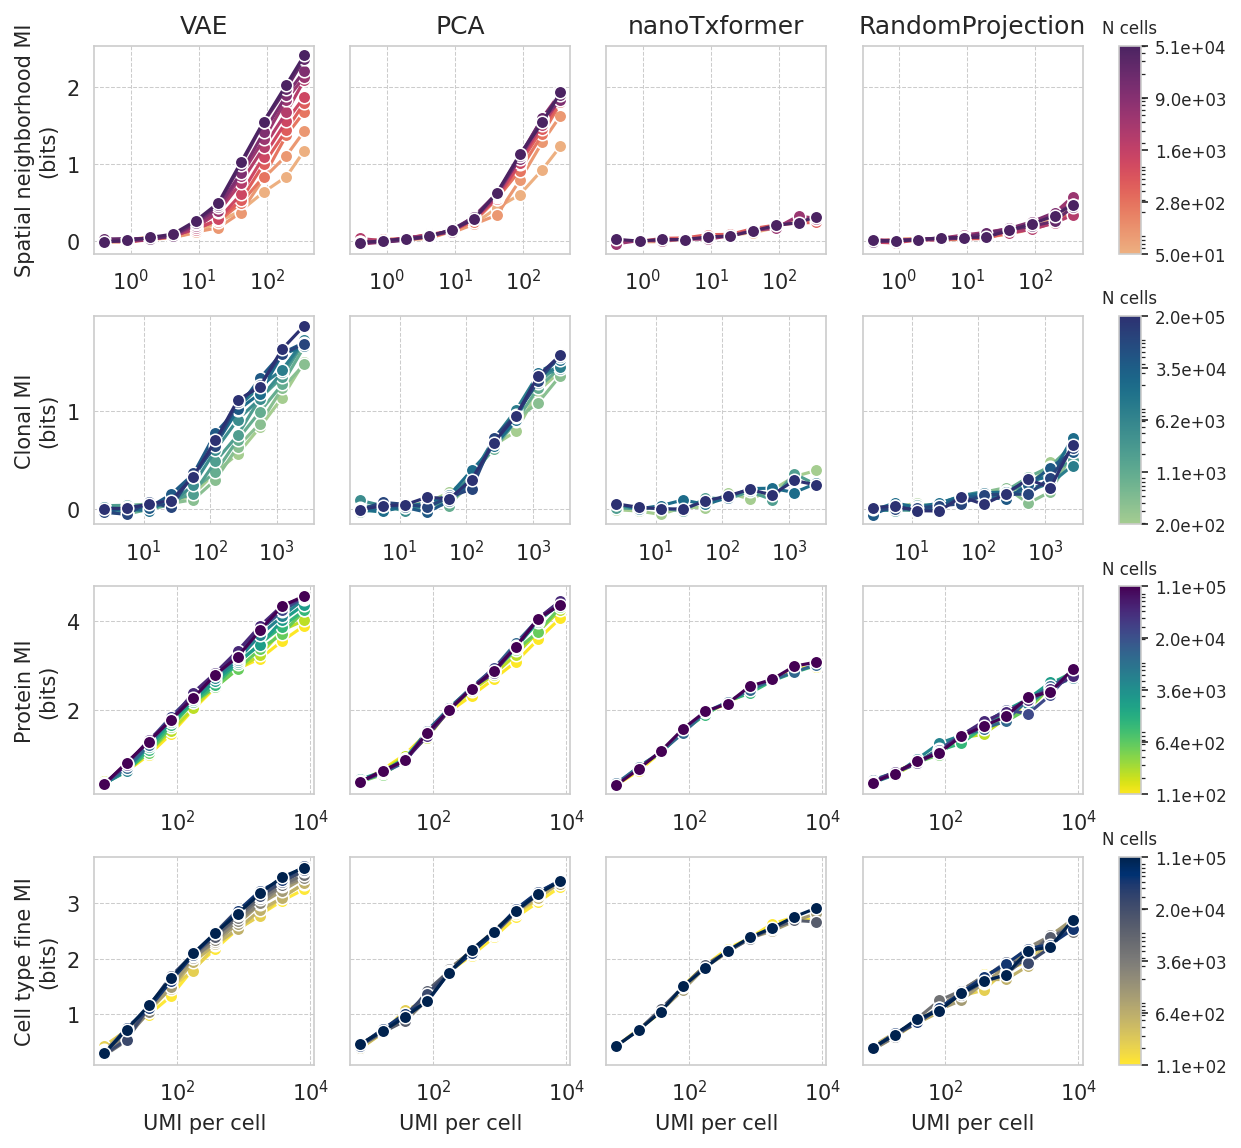

In [6]:
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterSciNotation

# prepare the data for grid
metrics = ['Spatial neighborhood MI', 'Clonal MI', 'Protein MI', 'Cell type fine MI']
model_types = hue_order
palettes = ['flare', 'crest', 'viridis_r', 'cividis_r']  # distinct palettes for rows

# number of legend entries
n_legend_colors = 5

# set up gridspec for equal subplot widths
fig = plt.figure(figsize=(9, 9), dpi=dpi)
# gs = gridspec.GridSpec(len(metrics), len(model_types) + 1, 
#                        width_ratios=[1] * len(model_types) + [0.1],  # extra space for colorbar
#                        wspace=0.2, hspace=0.3)

axes = fig.subplots(4,5, sharex=False, sharey='row', 
                    gridspec_kw = {'width_ratios':[1,1,1,1,0.1], 'wspace':0.2, 'hspace':0.3})

# add subplots and colorbars
for row, (metric, palette) in enumerate(zip(metrics, palettes)):
    for col, method in enumerate(model_types):
        ax = axes[row][col]
        
        # filter data by metric
        if metric == 'Spatial neighborhood MI':
            data = merf_df
        elif metric == 'Clonal MI':
            data = larry_df
        else:  # Protein MI or Cell type fine MI
            data = cite_df
        
        # plot with hue by 'Cell number' and log-normalized hue
        norm = LogNorm(vmin=data['Cell number'].min(), vmax=data['Cell number'].max())
        sns.lineplot(
            data=data[data['Method'] == method],
            x='UMI per cell', y=metric,
            hue='Cell number', hue_norm=norm,
            marker='o', palette=palette, ax=ax, legend=False
        )

        # set column titles
        if row == 0:
            ax.set_title(method)

        if row != 3:
            ax.set_xlabel('')
        
        # set row labels
        if col == 0:
            ax.set_ylabel(f"{metric}\n(bits)")
        
        ax.set_xscale('log')

    # create colorbar for the row
    vmin, vmax = data['Cell number'].min(), data['Cell number'].max()
    color_norm = LogNorm(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=color_norm)
    sm.set_array([])
    
    axes[row, -1].remove()
    # add the colorbar next to the last column of the row
    cbar_ax = fig.add_subplot(4, 5, 5+5*row)
    ticks = np.logspace(np.log10(vmin), np.log10(vmax), n_legend_colors)
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=ticks)
    cbar.ax.set_yticklabels([f"{t:.1e}" for t in ticks], fontsize=8)
    cbar.ax.set_title("N cells", fontsize=8)
    

# shared x-axis label
# fig.text(0.5, 0.02, 'UMI per cell (log scale)', ha='center', fontsize=10)

plt.show()


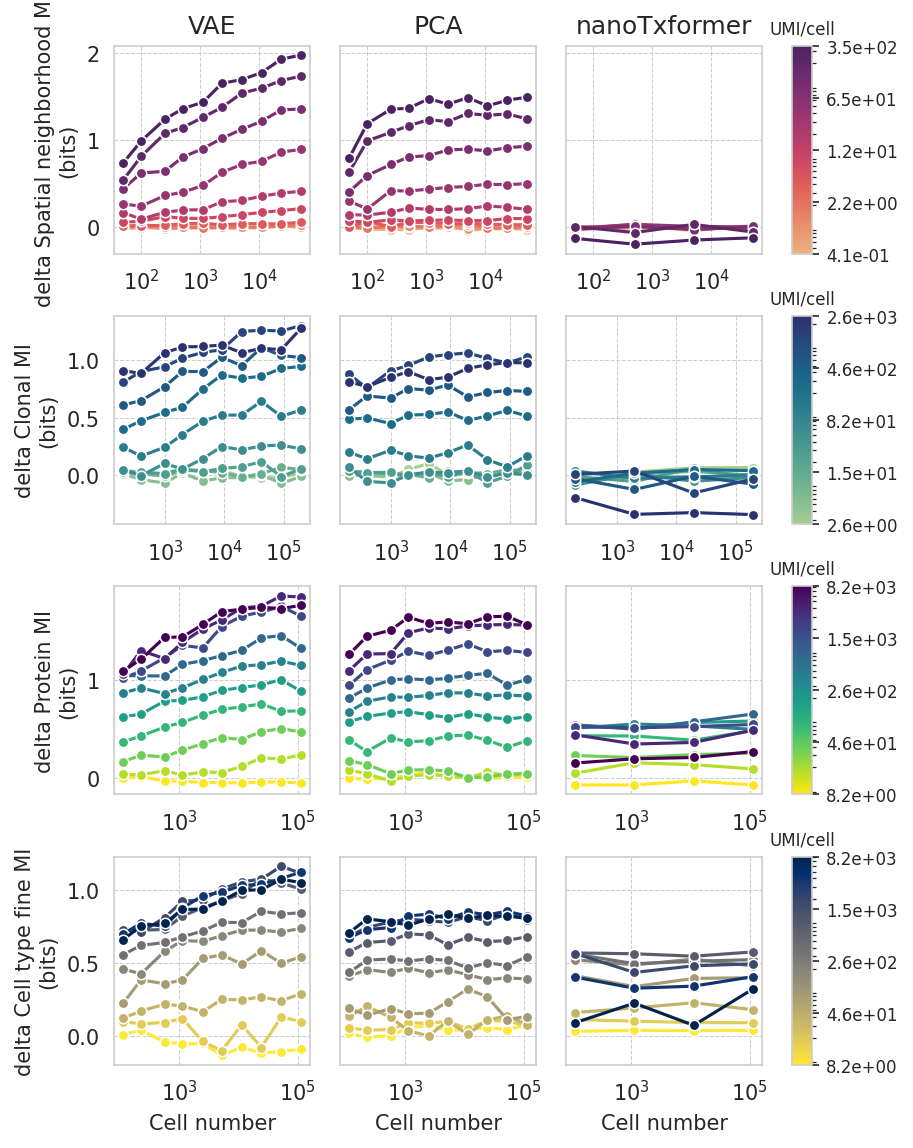

In [63]:
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterSciNotation

# prepare the data for grid
metrics = ['delta Spatial neighborhood MI', 'delta Clonal MI', 
           'delta Protein MI', 'delta Cell type fine MI']
model_types = hue_order[:-1]
palettes = ['flare', 'crest', 'viridis_r', 'cividis_r']  # distinct palettes for rows

# number of legend entries
n_legend_colors = 5

# set up gridspec for equal subplot widths
fig = plt.figure(figsize=(6, 9), dpi=dpi)

axes = fig.subplots(4,4, sharex=False, sharey='row', 
                    gridspec_kw = {'width_ratios':[1,1,1,0.1], 'wspace':0.2, 'hspace':0.3})

# add subplots and colorbars
for row, (metric, palette) in enumerate(zip(metrics, palettes)):
    for col, method in enumerate(model_types):
        ax = axes[row][col]
        
        # filter data by metric
        if metric == 'delta Spatial neighborhood MI':
            data = merf_df
        elif metric == 'delta Clonal MI':
            data = larry_df
        else:  # Protein MI or Cell type fine MI
            data = cite_df
        
        # plot with hue by 'Cell number' and log-normalized hue
        norm = LogNorm(vmin=data['UMI per cell'].min(), vmax=data['UMI per cell'].max())
        sns.lineplot(
            data=data[data['Method'] == method],
            hue='UMI per cell', y=metric,
            x='Cell number', hue_norm=norm, markersize=5,
            marker='o', palette=palette, ax=ax, legend=False
        )
        
# adjust layout
# plt.tight_layout(rect=[0.03, 0.03, 0.9, 0.97])  # keep space for colorbars
        # set column titles
        if row == 0:
            ax.set_title(method)


        if row != 3:
            ax.set_xlabel('')        
        
        # set row labels
        if col == 0:
            ax.set_ylabel(f"{metric}\n(bits)")
        
        ax.set_xscale('log')

    # create colorbar for the row
    vmin, vmax = data['UMI per cell'].min(), data['UMI per cell'].max()
    color_norm = LogNorm(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=color_norm)
    sm.set_array([])
    
    axes[row, -1].remove()
    # add the colorbar next to the last column of the row
    cbar_ax = fig.add_subplot(4, 4, 4+4*row)
    ticks = np.logspace(np.log10(vmin), np.log10(vmax), n_legend_colors)
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=ticks)
    cbar.ax.set_yticklabels([f"{t:.1e}" for t in ticks], fontsize=8)
    cbar.ax.set_title("UMI/cell", fontsize=8)
    

plt.show()


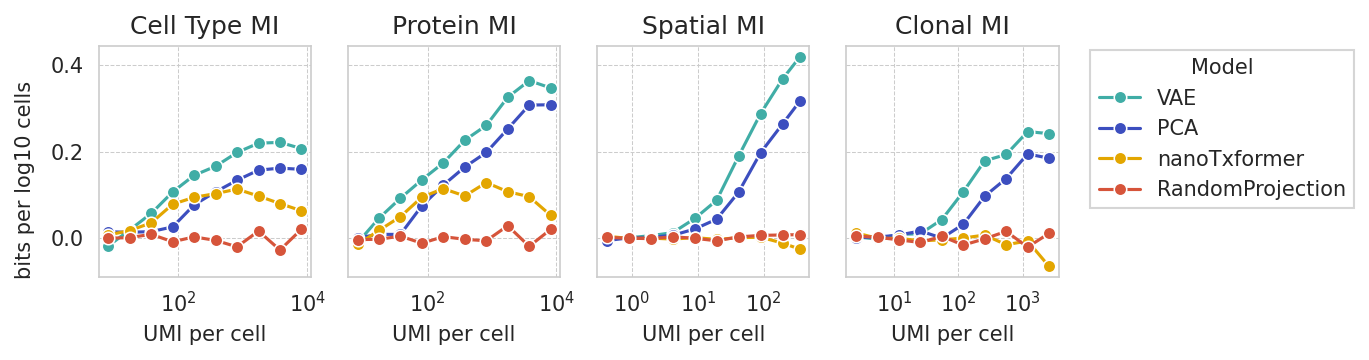

In [29]:
fig = plt.figure(figsize=(9, 2.5), dpi=dpi)


# create subplots
ct, prot, merf, larry = fig.subplots(1, 4, sharey=True)

# max cells and plots
max_cells = merf_df['Cell number'].max()
sns.lineplot(data=merf_df[merf_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Info gain (Spatial neighborhood MI)',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=merf)
merf.set_title('Spatial MI')
merf.set_xscale('log')

max_cells = larry_df['Cell number'].max()
sns.lineplot(data=larry_df[larry_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Info gain (Clonal MI)',
             hue='Method', legend=True, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=larry)
larry.set_title('Clonal MI')
larry.set_xscale('log')

max_cells = cite_df['Cell number'].max()
sns.lineplot(data=cite_df[cite_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Info gain (Protein MI)',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=prot)
prot.set_title('Protein MI')
prot.set_xscale('log')

sns.lineplot(data=cite_df[cite_df['Cell number'] == max_cells], 
             x='UMI per cell', y='Info gain (Cell type fine MI)',
             hue='Method', legend=False, marker='o',
             palette=pretty_palette, hue_order=hue_order,
             ax=ct)
ct.set_ylabel('')
ct.set_title('Cell Type MI')
ct.set_xscale('log')

# adjust legend
sns.move_legend(larry, "upper left", bbox_to_anchor=(1.1, 1.03), title='Model')

# shared y-axis label
fig.text(-0.01, 0.5, 'bits per log10 cells', va='center', 
         rotation='vertical', fontsize=10)

plt.tight_layout()
plt.show()

In [56]:
from scipy.optimize import curve_fit
def info_scaling(x, A, B):
    return 0.5 * np.log2((x*B+ 1)/(1+A*x))

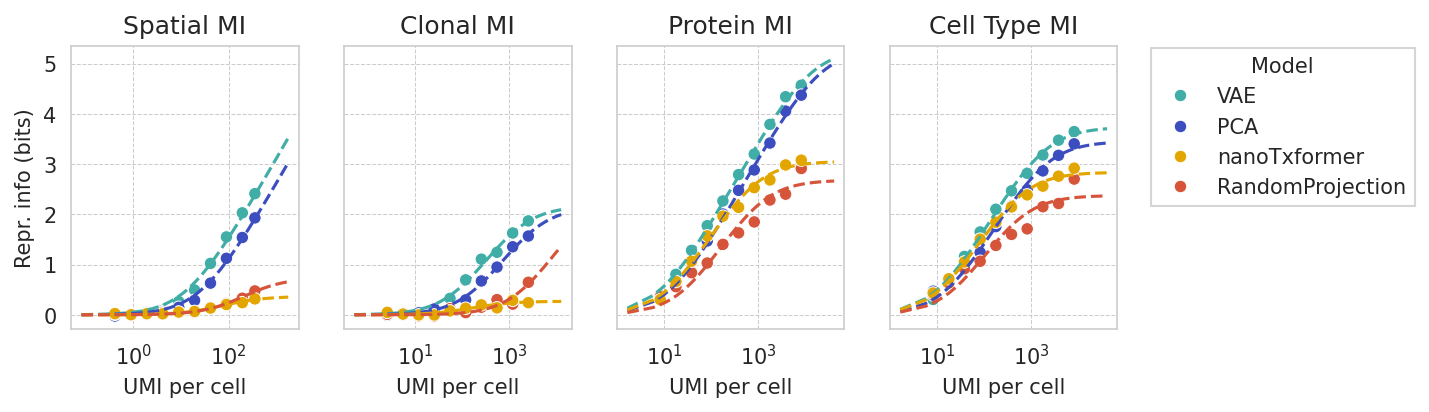

In [60]:
fig = plt.figure(figsize=(9, 2.5), dpi=dpi)

axs = fig.subplots(1, 4, sharey=True)
dfs = [merf_df, larry_df, cite_df, cite_df]
metrics = ['Spatial neighborhood MI', 'Clonal MI', 'Protein MI', 'Cell type fine MI']
names = ['Spatial MI', 'Clonal MI', 'Protein MI', 'Cell Type MI']

for ax, df, metric, name in zip(axs, dfs, metrics, names):
    max_cells = df[df['Cell number'] == df['Cell number'].max()]
    sns.scatterplot(data=max_cells, 
                x='UMI per cell', y=metric,
                hue='Method', marker='o',
                palette=pretty_palette, hue_order=hue_order,
                ax=ax, legend=name==names[-1])

    for i, method in enumerate(hue_order):
        x_data = max_cells[max_cells['Method']== method]['UMI per cell']
        ydata = max_cells[max_cells['Method']== method][metric]
        popt, pcov = curve_fit(info_scaling, x_data, ydata, 
                               p0 = [10**-2, 10**-2], bounds=[(0, 0), (np.inf, np.inf)])

        x_fit = np.linspace(x_data.min()/5, 5*x_data.max(), 10**4)
        ax.plot(x_fit, info_scaling(x_fit, *popt), color=pretty_palette[i], linestyle='--')
    
    ax.set_title(name)
    ax.set_xscale('log')
    ax.set_ylabel('')

axs[0].set_ylabel('Repr. info (bits)')

sns.move_legend(axs[-1], "upper left", bbox_to_anchor=(1.1, 1.03), title='Model')